In [1]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tf.executing_eagerly()

True

In [3]:
list_ds = tf.data.experimental.make_csv_dataset(
            os.path.join(os.getcwd(), '..', 'data', 'final_dataset_val_demo.csv'),
            batch_size=1,
            num_epochs=1,
            label_name='has_animal',
            prefetch_buffer_size=None,
            num_rows_for_inference=100,
            compression_type=None,
            ignore_errors=False
            )

Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.


In [4]:
def show_batch(dataset):
    for batch, label in dataset.take(4):
        for key, value in batch.items():
            print("{:20s}: {}".format(key,value.numpy()))
        print(label.numpy())

In [5]:
show_batch(list_ds)

sequence            : [21]
image1              : [b'120516010928001a1601.jpg']
image2              : [b'120516010928001a1602.jpg']
image3              : [b'120516010928001a1603.jpg']
[1]
sequence            : [24]
image1              : [b'090516043918001a1601.jpg']
image2              : [b'090516043918001a1602.jpg']
image3              : [b'090516043918001a1603.jpg']
[0]


In [23]:
def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=3)
    
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    
    return img

In [24]:
def parse_data(metadata, label):
    data_point = {}
    for img_name in ['image1', 'image2', 'image3']:
        img = tf.io.read_file(tf.strings.join([os.path.join(os.getcwd(), '..', 'data', 'images'), 
                                               os.sep, metadata[img_name]])[0])
        img = decode_img(img)
        data_point[img_name] = img
    return data_point, label

In [25]:
new_ds = list(list_ds.map(parse_data, num_parallel_calls=tf.data.experimental.AUTOTUNE))

In [26]:
new_ds[0]

({'image1': <tf.Tensor: id=377, shape=(2448, 3264, 3), dtype=float32, numpy=
  array([[[0.07058824, 0.07058824, 0.07058824],
          [0.06666667, 0.06666667, 0.06666667],
          [0.09019608, 0.09019608, 0.09019608],
          ...,
          [0.45098042, 0.45098042, 0.45098042],
          [0.40784317, 0.40784317, 0.40784317],
          [0.37254903, 0.37254903, 0.37254903]],
  
         [[0.07450981, 0.07450981, 0.07450981],
          [0.07843138, 0.07843138, 0.07843138],
          [0.10588236, 0.10588236, 0.10588236],
          ...,
          [0.43529415, 0.43529415, 0.43529415],
          [0.40784317, 0.40784317, 0.40784317],
          [0.38823533, 0.38823533, 0.38823533]],
  
         [[0.07058824, 0.07058824, 0.07058824],
          [0.07843138, 0.07843138, 0.07843138],
          [0.10196079, 0.10196079, 0.10196079],
          ...,
          [0.4156863 , 0.4156863 , 0.4156863 ],
          [0.40784317, 0.40784317, 0.40784317],
          [0.40784317, 0.40784317, 0.40784317]],
  
  

In [12]:
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(2):
        ax = plt.subplot(1, 2, n + 1)
        plt.imshow(image_batch[n])
        plt.axis('off')
        plt.title(label_batch[n].numpy())

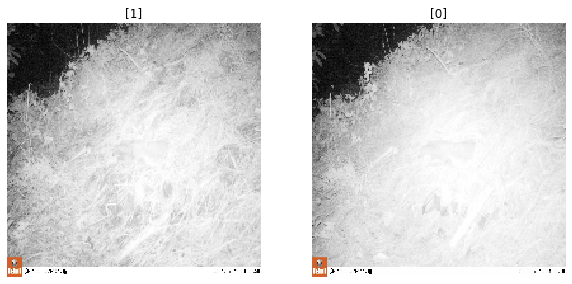

In [13]:
image_batch = [img for img, lab in new_ds]
label_batch = [lab for img, lab in new_ds]
show_batch(image_batch, label_batch)